[![Imagen de Portada](imagen_portada_datos_educativos_globales.png)

## Documentación del Dataset de Datos Educativos de la ONU
### Descripción General

Este dataset contiene datos educativos extraídos del portal de datos de las Naciones Unidas, disponible en UN Data. La recolección y limpieza de estos datos fue un proceso exhaustivo y meticuloso, que implicó el uso de técnicas avanzadas como expresiones regulares para garantizar la precisión y la utilidad del dataset.


**Agradecimientos**
Queremos agradecer a las Naciones Unidas por proporcionar estos datos de manera abierta y accesible. Su compromiso con la transparencia y la difusión del conocimiento es crucial para investigadores, analistas de datos y tomadores de decisiones en todo el mundo.

**Estructura del Dataset**

El dataset consta de las siguientes columnas:
**1.	Índice: Un número de índice único para cada fila.**
**2.	ID: Un identificador numérico asignado a cada registro.**
**3.	Pais: El nombre del país al que corresponden los datos.**
**4.	Año: El año en que se registraron los datos.**
**5.	Tipo de Dato Educativo: La categoría del dato educativo, como tasas de matrícula en diferentes niveles educativos.**
**6.	Tasa: El valor numérico asociado con el tipo de dato educativo.**
**7.	Fuente Datos: La fuente de donde se extrajeron los datos, en este caso, la ONU.
Posibles Usos del Dataset**

Este dataset es adecuado para una variedad de análisis y aplicaciones, tales como:

•	**Análisis de Tendencias Educativas:** Explorar cómo las tasas de matriculación y otros indicadores educativos han cambiado a lo largo del tiempo en diferentes países.
•	**Comparaciones Internacionales:** Realizar comparaciones entre países en términos de sus avances y desafíos educativos.
•	**Modelado Predictivo:** Utilizar los datos para predecir tendencias futuras en la educación a nivel global o regional.
•	**Investigación en Políticas Educativas:** Proporcionar una base de datos sólida para investigadores y formuladores de políticas interesados en mejorar los sistemas educativos.
Proceso de Limpieza y Preparación
El proceso de limpieza y preparación de este dataset fue particularmente desafiante. Se emplearon expresiones regulares para filtrar y organizar los datos de manera efectiva. Este proceso garantizó que el dataset final estuviera libre de errores comunes como entradas duplicadas, valores faltantes o malformados 


### Carga de datos

In [1]:
import pandas as pd

try:
    df = pd.read_csv('education.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('education.csv', encoding='ISO-8859-1')


In [2]:
df

,"1,""Total, all countries or areas"",2005,Students enrolled in primary education (thousands),""678,907"",Estimate.,""United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed April 2023."""
0,"1,""Total, all countries or areas"",2005,Gross e..."
1,"1,""Total, all countries or areas"",2005,Gross e..."
2,"1,""Total, all countries or areas"",2005,Student..."
3,"1,""Total, all countries or areas"",2005,Gross e..."
4,"1,""Total, all countries or areas"",2005,Gross e..."
...,...
7524,"722,SIDS,2020,Gross enrollment ratio - Lower s..."
7525,"722,SIDS,2020,Gross enrollment ratio - Lower s..."
7526,"722,SIDS,2020,Students enrolled in upper secon..."
7527,"722,SIDS,2020,Gross enrollment ratio - Upper s..."


###### Nos encontramos con una desestructuracion del dataset bastante compleja, los separadores del csv parecen ser comas, dobles comillas, comillas y espacios, ademas hay columnas vacias, usaremos expresiones regulares.

In [3]:
import re
# Modificando la función para utilizar pandas.concat en lugar de append

def ajustar_estructura_detallada(df):
    # Lista para almacenar las filas ajustadas
    filas_ajustadas = []

    # Iterar a través de cada fila del DataFrame original
    for index, row in df.iterrows():
        # Obtener la fila como un string
        fila = row.iloc[0]

        # Uso de expresiones regulares para separar los datos correctamente
        partes = re.split(r',(?=(?:[^\"]*\"[^\"]*\")*[^\"]*$)', fila)

        # Preparar la fila para agregar el índice al principio
        fila_ajustada = [index] + partes

        # Agregar la fila ajustada a la lista
        filas_ajustadas.append(fila_ajustada)

    # Usar pandas.concat para crear un nuevo DataFrame a partir de la lista de filas
    df_ajustado = pd.concat([pd.DataFrame([fila]) for fila in filas_ajustadas], ignore_index=True)

    return df_ajustado

# Ajustar el DataFrame con la estructura detallada
df_ajustado_detallado = ajustar_estructura_detallada(df)
df_ajustado_detallado.head()


,0,1,2,3,4,5,6,7
0,0,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.,"""United Nations Educational, Scientific and Cu..."
1,1,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (female),99.7,,"""United Nations Educational, Scientific and Cu..."
2,2,1,"""Total, all countries or areas""",2005,Students enrolled in lower secondary education...,"""309,665""",,"""United Nations Educational, Scientific and Cu..."
3,3,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,80.7,,"""United Nations Educational, Scientific and Cu..."
4,4,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,76.7,,"""United Nations Educational, Scientific and Cu..."


##### Vamos a ponerle nombre mas especificos a las columnas

In [4]:
# Ajustando los nombres de las columnas para que coincidan con las columnas reales del DataFrame

# Nombres de columnas ajustados
nombres_columnas_ajustados = [
    "Índice", "ID", "Pais", 
    "Año", "Tipo de Dato Educativo", "Tasa", 
    "Nota Adicional", "Fuente Datos"
]

# Asignar los nombres de las columnas al DataFrame
df_ajustado_detallado.columns = nombres_columnas_ajustados

df_ajustado_detallado.head()


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
0,0,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.,"""United Nations Educational, Scientific and Cu..."
1,1,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (female),99.7,,"""United Nations Educational, Scientific and Cu..."
2,2,1,"""Total, all countries or areas""",2005,Students enrolled in lower secondary education...,"""309,665""",,"""United Nations Educational, Scientific and Cu..."
3,3,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,80.7,,"""United Nations Educational, Scientific and Cu..."
4,4,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,76.7,,"""United Nations Educational, Scientific and Cu..."


##### Creamos una copia del dataframe

In [5]:
# Creando una copia del DataFrame y nombrándola como df1
df1 = df_ajustado_detallado.copy()
df1


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
0,0,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.,"""United Nations Educational, Scientific and Cu..."
1,1,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (female),99.7,,"""United Nations Educational, Scientific and Cu..."
2,2,1,"""Total, all countries or areas""",2005,Students enrolled in lower secondary education...,"""309,665""",,"""United Nations Educational, Scientific and Cu..."
3,3,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,80.7,,"""United Nations Educational, Scientific and Cu..."
4,4,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,76.7,,"""United Nations Educational, Scientific and Cu..."
...,...,...,...,...,...,...,...,...
7524,7524,722,SIDS,2020,Gross enrollment ratio - Lower secondary level...,76.5,Estimate.,"""United Nations Educational, Scientific and Cu..."
7525,7525,722,SIDS,2020,Gross enrollment ratio - Lower secondary level...,74.8,Estimate.,"""United Nations Educational, Scientific and Cu..."
7526,7526,722,SIDS,2020,Students enrolled in upper secondary education...,"""1,890""",Estimate.,"""United Nations Educational, Scientific and Cu..."
7527,7527,722,SIDS,2020,Gross enrollment ratio - Upper secondary level...,56.1,Estimate.,"""United Nations Educational, Scientific and Cu..."


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Índice                  7529 non-null   int64 
 1   ID                      7529 non-null   object
 2   Pais                    7529 non-null   object
 3   Año                     7529 non-null   object
 4   Tipo de Dato Educativo  7529 non-null   object
 5   Tasa                    7529 non-null   object
 6   Nota Adicional          7529 non-null   object
 7   Fuente Datos            7529 non-null   object
dtypes: int64(1), object(7)
memory usage: 470.7+ KB


In [7]:
df1.describe()

,Índice
count,7529.000000
mean,3764.000000
std,2173.579421
min,0.000000
25%,1882.000000
50%,3764.000000
75%,5646.000000
max,7528.000000


##### Obtenemos los valores unicos de la columan Pais

In [8]:
# Obteniendo los valores únicos de la columna "Pais"
valores_unicos_area = df1["Pais"].unique()
valores_unicos_area


array(['"Total, all countries or areas"', 'Northern Africa',
       'Sub-Saharan Africa', 'Northern America',
       'Latin America & the Caribbean', 'Central Asia', 'Eastern Asia',
       'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Europe',
       'Oceania', 'Australia and New Zealand', 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', '"China, Hong Kong SAR"',
       '"China, Macao SAR"', 'Colombia', 'Comoros', 

##### Hacemos un cribado y nos quedamos solo con los paises

In [9]:
# Ajustando la lista de filas a eliminar para incluir los elementos adicionales proporcionados
filas_a_eliminar = [
    "Total, all countries or areas", "Northern Africa",
    "Sub-Saharan Africa", "Northern America",
    "Latin America & the Caribbean", "Central Asia", "Eastern Asia",
    "South-eastern Asia", "Southern Asia", "Western Asia", "Europe",
    "Oceania", "LLDCs", "LDC§", "SIDS"
]

# Eliminando las filas especificadas
df1_filtrado = df1[~df1["Pais"].isin(filas_a_eliminar)]
df1_filtrado.head()


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
0,0,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.,"""United Nations Educational, Scientific and Cu..."
1,1,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (female),99.7,,"""United Nations Educational, Scientific and Cu..."
2,2,1,"""Total, all countries or areas""",2005,Students enrolled in lower secondary education...,"""309,665""",,"""United Nations Educational, Scientific and Cu..."
3,3,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,80.7,,"""United Nations Educational, Scientific and Cu..."
4,4,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,76.7,,"""United Nations Educational, Scientific and Cu..."


In [10]:
# Aplicando la eliminación de filas en el DataFrame df1
df1 = df1[~df1["Pais"].isin(filas_a_eliminar)]
df1.head()


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
0,0,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.,"""United Nations Educational, Scientific and Cu..."
1,1,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Primary (female),99.7,,"""United Nations Educational, Scientific and Cu..."
2,2,1,"""Total, all countries or areas""",2005,Students enrolled in lower secondary education...,"""309,665""",,"""United Nations Educational, Scientific and Cu..."
3,3,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,80.7,,"""United Nations Educational, Scientific and Cu..."
4,4,1,"""Total, all countries or areas""",2005,Gross enrollment ratio - Lower secondary level...,76.7,,"""United Nations Educational, Scientific and Cu..."


In [11]:
# Ajustando la lista de filas a eliminar para incluir las comillas donde sea necesario
filas_a_eliminar_ajustadas = [
    '"Total, all countries or areas"', "Northern Africa",
    "Sub-Saharan Africa", "Northern America",
    "Latin America & the Caribbean", "Central Asia", "Eastern Asia",
    "South-eastern Asia", "Southern Asia", "Western Asia", "Europe",
    "Oceania", "LLDCs", "LDC§", "SIDS"
]

# Eliminando las filas especificadas del DataFrame df1
df1 = df1[~df1["Pais"].isin(filas_a_eliminar_ajustadas)]

# Verificando si las filas se han eliminado correctamente
df1["Pais"].unique()[:10]


array(['Australia and New Zealand', 'Afghanistan', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia'], dtype=object)

In [12]:
df1

,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
431,431,53,Australia and New Zealand,2005,Students enrolled in primary education (thousa...,"""2,288""",,"""United Nations Educational, Scientific and Cu..."
432,432,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (male),101.7,,"""United Nations Educational, Scientific and Cu..."
433,433,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (female),102.9,,"""United Nations Educational, Scientific and Cu..."
434,434,53,Australia and New Zealand,2005,Students enrolled in lower secondary education...,"""1,588""",Estimate.,"""United Nations Educational, Scientific and Cu..."
435,435,53,Australia and New Zealand,2005,Gross enrollment ratio - Lower secondary level...,114.3,Estimate.,"""United Nations Educational, Scientific and Cu..."
...,...,...,...,...,...,...,...,...
7416,7416,716,Zimbabwe,2015,Gross enrollment ratio - Primary (male),104.9,,"""United Nations Educational, Scientific and Cu..."
7417,7417,716,Zimbabwe,2015,Gross enrollment ratio - Primary (female),102.8,,"""United Nations Educational, Scientific and Cu..."
7418,7418,716,Zimbabwe,2021,Students enrolled in primary education (thousa...,"""2,899""",,"""United Nations Educational, Scientific and Cu..."
7419,7419,716,Zimbabwe,2021,Gross enrollment ratio - Primary (male),95.9,,"""United Nations Educational, Scientific and Cu..."


##### Obtenemos los valores unicos de la columan Tipo de Dato Educativo

In [13]:
# Obteniendo los valores únicos de la columna "Pais"
valores_unicos_area = df1["Tipo de Dato Educativo"].unique()
valores_unicos_area


array(['Students enrolled in primary education (thousands)',
       'Gross enrollment ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in lower secondary education (thousands)',
       'Gross enrollment ratio - Lower secondary level (male)',
       'Gross enrollment ratio - Lower secondary level (female)',
       'Students enrolled in upper secondary education (thousands)',
       'Gross enrollment ratio - Upper secondary level (male)',
       'Gross enrollment ratio - Upper secondary level (female)'],
      dtype=object)

##### Vamos a crear columnas nuevas a partir de esos datos a ver que tal.

In [14]:
# Reintentando la creación de nuevas columnas con un enfoque más robusto

# Extraemos los valores únicos nuevamente para asegurarnos de su precisión
valores_unicos_tipo = df1["Tipo de Dato Educativo"].unique()

# Inicializando las nuevas columnas con NaN
for tipo in valores_unicos_tipo:
    df1[tipo] = float('nan')

# Función para convertir los valores a numéricos si es posible
def convertir_a_numerico(valor):
    try:
        return float(valor.replace(",", ""))
    except:
        return valor

# Rellenando las nuevas columnas con los valores correspondientes
for index, row in df1.iterrows():
    tipo_dato = row["Tipo de Dato Educativo"]
    valor = row["Tasa"]
    valor_numerico = convertir_a_numerico(valor)
    df1.at[index, tipo_dato] = valor_numerico

# Mostrando las primeras filas del DataFrame modificado
df1.head()


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos,Students enrolled in primary education (thousands),Gross enrollment ratio - Primary (male),Gross enrollment ratio - Primary (female),Students enrolled in lower secondary education (thousands),Gross enrollment ratio - Lower secondary level (male),Gross enrollment ratio - Lower secondary level (female),Students enrolled in upper secondary education (thousands),Gross enrollment ratio - Upper secondary level (male),Gross enrollment ratio - Upper secondary level (female)
431,431,53,Australia and New Zealand,2005,Students enrolled in primary education (thousa...,"""2,288""",,"""United Nations Educational, Scientific and Cu...","""2,288""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,432,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (male),101.7,,"""United Nations Educational, Scientific and Cu...",NaN,101.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,433,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (female),102.9,,"""United Nations Educational, Scientific and Cu...",NaN,NaN,102.9,NaN,NaN,NaN,NaN,NaN,NaN
434,434,53,Australia and New Zealand,2005,Students enrolled in lower secondary education...,"""1,588""",Estimate.,"""United Nations Educational, Scientific and Cu...",NaN,NaN,NaN,"""1,588""",NaN,NaN,NaN,NaN,NaN
435,435,53,Australia and New Zealand,2005,Gross enrollment ratio - Lower secondary level...,114.3,Estimate.,"""United Nations Educational, Scientific and Cu...",NaN,NaN,NaN,NaN,114.3,NaN,NaN,NaN,NaN


##### Vamos darle nombre mas descriptivos a las nuevas columnas

In [15]:
import pandas as pd

# Suponiendo que df1 es tu DataFrame original
# Mapeo de nombres de columnas del tipo de dato educativo a nombres en español
mapeo_nombres_columnas = {
    'Students enrolled in primary education (thousands)': 'Estudiantes Primaria (miles)',
    'Gross enrollment ratio - Primary (male)': 'Tasa Matrícula Primaria (Hombres)',
    'Gross enrollment ratio - Primary (female)': 'Tasa Matrícula Primaria (Mujeres)',
    'Students enrolled in lower secondary education (thousands)': 'Estudiantes Secundaria Baja (miles)',
    'Gross enrollment ratio - Lower secondary level (male)': 'Tasa Matrícula Sec. Baja (Hombres)',
    'Gross enrollment ratio - Lower secondary level (female)': 'Tasa Matrícula Sec. Baja (Mujeres)',
    'Students enrolled in upper secondary education (thousands)': 'Estudiantes Secundaria Alta (miles)',
    'Gross enrollment ratio - Upper secondary level (male)': 'Tasa Matrícula Sec. Alta (Hombres)',
    'Gross enrollment ratio - Upper secondary level (female)': 'Tasa Matrícula Sec. Alta (Mujeres)'
}

# Inicializando nuevas columnas con NaN
for nombre_columna in mapeo_nombres_columnas.values():
    df1[nombre_columna] = pd.NA

# Función para convertir a numérico, si es posible
def convertir_a_numerico(valor):
    try:
        return float(valor.replace(",", ""))
    except:
        return valor

# Rellenando las nuevas columnas
for index, row in df1.iterrows():
    tipo_dato = row["Tipo de Dato Educativo"]
    valor = row["Tasa"]
    nombre_columna_nuevo = mapeo_nombres_columnas.get(tipo_dato)
    
    if nombre_columna_nuevo:
        df1.at[index, nombre_columna_nuevo] = convertir_a_numerico(valor)

# Verificando las primeras filas del DataFrame modificado
pd.set_option('display.max_columns', None)
df1


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos,Students enrolled in primary education (thousands),Gross enrollment ratio - Primary (male),Gross enrollment ratio - Primary (female),Students enrolled in lower secondary education (thousands),Gross enrollment ratio - Lower secondary level (male),Gross enrollment ratio - Lower secondary level (female),Students enrolled in upper secondary education (thousands),Gross enrollment ratio - Upper secondary level (male),Gross enrollment ratio - Upper secondary level (female),Estudiantes Primaria (miles),Tasa Matrícula Primaria (Hombres),Tasa Matrícula Primaria (Mujeres),Estudiantes Secundaria Baja (miles),Tasa Matrícula Sec. Baja (Hombres),Tasa Matrícula Sec. Baja (Mujeres),Estudiantes Secundaria Alta (miles),Tasa Matrícula Sec. Alta (Hombres),Tasa Matrícula Sec. Alta (Mujeres)
431,431,53,Australia and New Zealand,2005,Students enrolled in primary education (thousa...,"""2,288""",,"""United Nations Educational, Scientific and Cu...","""2,288""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""2,288""",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
432,432,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (male),101.7,,"""United Nations Educational, Scientific and Cu...",NaN,101.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,101.7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
433,433,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (female),102.9,,"""United Nations Educational, Scientific and Cu...",NaN,NaN,102.9,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,102.9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
434,434,53,Australia and New Zealand,2005,Students enrolled in lower secondary education...,"""1,588""",Estimate.,"""United Nations Educational, Scientific and Cu...",NaN,NaN,NaN,"""1,588""",NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,"""1,588""",<NA>,<NA>,<NA>,<NA>,<NA>
435,435,53,Australia and New Zealand,2005,Gross enrollment ratio - Lower secondary level...,114.3,Estimate.,"""United Nations Educational, Scientific and Cu...",NaN,NaN,NaN,NaN,114.3,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,114.3,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,7416,716,Zimbabwe,2015,Gross enrollment ratio - Primary (male),104.9,,"""United Nations Educational, Scientific and Cu...",NaN,104.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,104.9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7417,7417,716,Zimbabwe,2015,Gross enrollment ratio - Primary (female),102.8,,"""United Nations Educational, Scientific and Cu...",NaN,NaN,102.8,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,102.8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7418,7418,716,Zimbabwe,2021,Students enrolled in primary education (thousa...,"""2,899""",,"""United Nations Educational, Scientific and Cu...","""2,899""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""2,899""",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7419,7419,716,Zimbabwe,2021,Gross enrollment ratio - Primary (male),95.9,,"""United Nations Educational, Scientific and Cu...",NaN,95.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,95.9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 431 to 7420
Data columns (total 26 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Índice                                                      6990 non-null   int64  
 1   ID                                                          6990 non-null   object 
 2   Pais                                                        6990 non-null   object 
 3   Año                                                         6990 non-null   object 
 4   Tipo de Dato Educativo                                      6990 non-null   object 
 5   Tasa                                                        6990 non-null   object 
 6   Nota Adicional                                              6990 non-null   object 
 7   Fuente Datos                                                6990 non-null   object 
 

In [17]:
# Lista de nombres de columnas en inglés para eliminar
columnas_a_eliminar = [
    'Students enrolled in primary education (thousands)',
    'Gross enrollment ratio - Primary (male)',
    'Gross enrollment ratio - Primary (female)',
    'Students enrolled in lower secondary education (thousands)',
    'Gross enrollment ratio - Lower secondary level (male)',
    'Gross enrollment ratio - Lower secondary level (female)',
    'Students enrolled in upper secondary education (thousands)',
    'Gross enrollment ratio - Upper secondary level (male)',
    'Gross enrollment ratio - Upper secondary level (female)'
]

# Eliminando las columnas en inglés
df1 = df1.drop(columns=columnas_a_eliminar)

# Verificando el DataFrame después de la eliminación
df1


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos,Estudiantes Primaria (miles),Tasa Matrícula Primaria (Hombres),Tasa Matrícula Primaria (Mujeres),Estudiantes Secundaria Baja (miles),Tasa Matrícula Sec. Baja (Hombres),Tasa Matrícula Sec. Baja (Mujeres),Estudiantes Secundaria Alta (miles),Tasa Matrícula Sec. Alta (Hombres),Tasa Matrícula Sec. Alta (Mujeres)
431,431,53,Australia and New Zealand,2005,Students enrolled in primary education (thousa...,"""2,288""",,"""United Nations Educational, Scientific and Cu...","""2,288""",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
432,432,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (male),101.7,,"""United Nations Educational, Scientific and Cu...",<NA>,101.7,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
433,433,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (female),102.9,,"""United Nations Educational, Scientific and Cu...",<NA>,<NA>,102.9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
434,434,53,Australia and New Zealand,2005,Students enrolled in lower secondary education...,"""1,588""",Estimate.,"""United Nations Educational, Scientific and Cu...",<NA>,<NA>,<NA>,"""1,588""",<NA>,<NA>,<NA>,<NA>,<NA>
435,435,53,Australia and New Zealand,2005,Gross enrollment ratio - Lower secondary level...,114.3,Estimate.,"""United Nations Educational, Scientific and Cu...",<NA>,<NA>,<NA>,<NA>,114.3,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7416,7416,716,Zimbabwe,2015,Gross enrollment ratio - Primary (male),104.9,,"""United Nations Educational, Scientific and Cu...",<NA>,104.9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7417,7417,716,Zimbabwe,2015,Gross enrollment ratio - Primary (female),102.8,,"""United Nations Educational, Scientific and Cu...",<NA>,<NA>,102.8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7418,7418,716,Zimbabwe,2021,Students enrolled in primary education (thousa...,"""2,899""",,"""United Nations Educational, Scientific and Cu...","""2,899""",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7419,7419,716,Zimbabwe,2021,Gross enrollment ratio - Primary (male),95.9,,"""United Nations Educational, Scientific and Cu...",<NA>,95.9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 431 to 7420
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Índice                               6990 non-null   int64 
 1   ID                                   6990 non-null   object
 2   Pais                                 6990 non-null   object
 3   Año                                  6990 non-null   object
 4   Tipo de Dato Educativo               6990 non-null   object
 5   Tasa                                 6990 non-null   object
 6   Nota Adicional                       6990 non-null   object
 7   Fuente Datos                         6990 non-null   object
 8   Estudiantes Primaria (miles)         872 non-null    object
 9   Tasa Matrícula Primaria (Hombres)    816 non-null    object
 10  Tasa Matrícula Primaria (Mujeres)    816 non-null    object
 11  Estudiantes Secundaria Baja (miles)  816 

In [19]:
# Obteniendo los valores únicos de la columna "Pais"
valores_unicos_area = df1["Tipo de Dato Educativo"].unique()
valores_unicos_area


array(['Students enrolled in primary education (thousands)',
       'Gross enrollment ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in lower secondary education (thousands)',
       'Gross enrollment ratio - Lower secondary level (male)',
       'Gross enrollment ratio - Lower secondary level (female)',
       'Students enrolled in upper secondary education (thousands)',
       'Gross enrollment ratio - Upper secondary level (male)',
       'Gross enrollment ratio - Upper secondary level (female)'],
      dtype=object)

##### Visto los resultados obtenidos, decidimos separar el conjunto de datos en dos dataframes. El primer data frame tendra las columnas de 0 al 7, el segundo dataframe tendrá las columnas del 8 en adelante.

In [20]:
# Dividiendo el DataFrame de acuerdo a la especificación proporcionada
df1_corrected = df1.iloc[:, :8]  # Columnas del 0 al 7
df2_corrected = df1.iloc[:, 8:14]  # Columnas del 8 al 13

# Verificando la cantidad de columnas en cada DataFrame y mostrando los primeros registros
df1_corrected_shape = df1_corrected.shape
df2_corrected_shape = df2_corrected.shape
df1_corrected_head = df1_corrected.head()
df2_corrected_head = df2_corrected.head()

(df1_corrected_shape, df1_corrected_head), (df2_corrected_shape, df2_corrected_head)


(((6990, 8),
       Índice  ID                       Pais   Año  \
  431     431  53  Australia and New Zealand  2005   
  432     432  53  Australia and New Zealand  2005   
  433     433  53  Australia and New Zealand  2005   
  434     434  53  Australia and New Zealand  2005   
  435     435  53  Australia and New Zealand  2005   
  
                                  Tipo de Dato Educativo     Tasa  \
  431  Students enrolled in primary education (thousa...  "2,288"   
  432            Gross enrollment ratio - Primary (male)    101.7   
  433          Gross enrollment ratio - Primary (female)    102.9   
  434  Students enrolled in lower secondary education...  "1,588"   
  435  Gross enrollment ratio - Lower secondary level...    114.3   
  
      Nota Adicional                                       Fuente Datos  
  431                 "United Nations Educational, Scientific and Cu...  
  432                 "United Nations Educational, Scientific and Cu...  
  433                

In [21]:
df1_corrected

,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
431,431,53,Australia and New Zealand,2005,Students enrolled in primary education (thousa...,"""2,288""",,"""United Nations Educational, Scientific and Cu..."
432,432,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (male),101.7,,"""United Nations Educational, Scientific and Cu..."
433,433,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (female),102.9,,"""United Nations Educational, Scientific and Cu..."
434,434,53,Australia and New Zealand,2005,Students enrolled in lower secondary education...,"""1,588""",Estimate.,"""United Nations Educational, Scientific and Cu..."
435,435,53,Australia and New Zealand,2005,Gross enrollment ratio - Lower secondary level...,114.3,Estimate.,"""United Nations Educational, Scientific and Cu..."
...,...,...,...,...,...,...,...,...
7416,7416,716,Zimbabwe,2015,Gross enrollment ratio - Primary (male),104.9,,"""United Nations Educational, Scientific and Cu..."
7417,7417,716,Zimbabwe,2015,Gross enrollment ratio - Primary (female),102.8,,"""United Nations Educational, Scientific and Cu..."
7418,7418,716,Zimbabwe,2021,Students enrolled in primary education (thousa...,"""2,899""",,"""United Nations Educational, Scientific and Cu..."
7419,7419,716,Zimbabwe,2021,Gross enrollment ratio - Primary (male),95.9,,"""United Nations Educational, Scientific and Cu..."


In [22]:
df2_corrected

,Estudiantes Primaria (miles),Tasa Matrícula Primaria (Hombres),Tasa Matrícula Primaria (Mujeres),Estudiantes Secundaria Baja (miles),Tasa Matrícula Sec. Baja (Hombres),Tasa Matrícula Sec. Baja (Mujeres)
431,"""2,288""",<NA>,<NA>,<NA>,<NA>,<NA>
432,<NA>,101.7,<NA>,<NA>,<NA>,<NA>
433,<NA>,<NA>,102.9,<NA>,<NA>,<NA>
434,<NA>,<NA>,<NA>,"""1,588""",<NA>,<NA>
435,<NA>,<NA>,<NA>,<NA>,114.3,<NA>
...,...,...,...,...,...,...
7416,<NA>,104.9,<NA>,<NA>,<NA>,<NA>
7417,<NA>,<NA>,102.8,<NA>,<NA>,<NA>
7418,"""2,899""",<NA>,<NA>,<NA>,<NA>,<NA>
7419,<NA>,95.9,<NA>,<NA>,<NA>,<NA>


##### Hacemos copia de los dataframes

In [23]:
# Creando una copia del DataFrame y nombrándola como df1
df1c = df1_corrected.copy()
df2c = df2_corrected.copy()


In [24]:
df1c

,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
431,431,53,Australia and New Zealand,2005,Students enrolled in primary education (thousa...,"""2,288""",,"""United Nations Educational, Scientific and Cu..."
432,432,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (male),101.7,,"""United Nations Educational, Scientific and Cu..."
433,433,53,Australia and New Zealand,2005,Gross enrollment ratio - Primary (female),102.9,,"""United Nations Educational, Scientific and Cu..."
434,434,53,Australia and New Zealand,2005,Students enrolled in lower secondary education...,"""1,588""",Estimate.,"""United Nations Educational, Scientific and Cu..."
435,435,53,Australia and New Zealand,2005,Gross enrollment ratio - Lower secondary level...,114.3,Estimate.,"""United Nations Educational, Scientific and Cu..."
...,...,...,...,...,...,...,...,...
7416,7416,716,Zimbabwe,2015,Gross enrollment ratio - Primary (male),104.9,,"""United Nations Educational, Scientific and Cu..."
7417,7417,716,Zimbabwe,2015,Gross enrollment ratio - Primary (female),102.8,,"""United Nations Educational, Scientific and Cu..."
7418,7418,716,Zimbabwe,2021,Students enrolled in primary education (thousa...,"""2,899""",,"""United Nations Educational, Scientific and Cu..."
7419,7419,716,Zimbabwe,2021,Gross enrollment ratio - Primary (male),95.9,,"""United Nations Educational, Scientific and Cu..."


In [25]:
df2c

,Estudiantes Primaria (miles),Tasa Matrícula Primaria (Hombres),Tasa Matrícula Primaria (Mujeres),Estudiantes Secundaria Baja (miles),Tasa Matrícula Sec. Baja (Hombres),Tasa Matrícula Sec. Baja (Mujeres)
431,"""2,288""",<NA>,<NA>,<NA>,<NA>,<NA>
432,<NA>,101.7,<NA>,<NA>,<NA>,<NA>
433,<NA>,<NA>,102.9,<NA>,<NA>,<NA>
434,<NA>,<NA>,<NA>,"""1,588""",<NA>,<NA>
435,<NA>,<NA>,<NA>,<NA>,114.3,<NA>
...,...,...,...,...,...,...
7416,<NA>,104.9,<NA>,<NA>,<NA>,<NA>
7417,<NA>,<NA>,102.8,<NA>,<NA>,<NA>
7418,"""2,899""",<NA>,<NA>,<NA>,<NA>,<NA>
7419,<NA>,95.9,<NA>,<NA>,<NA>,<NA>


In [26]:
df1c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 431 to 7420
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Índice                  6990 non-null   int64 
 1   ID                      6990 non-null   object
 2   Pais                    6990 non-null   object
 3   Año                     6990 non-null   object
 4   Tipo de Dato Educativo  6990 non-null   object
 5   Tasa                    6990 non-null   object
 6   Nota Adicional          6990 non-null   object
 7   Fuente Datos            6990 non-null   object
dtypes: int64(1), object(7)
memory usage: 749.5+ KB


##### Vamos a convertir la columna Año en date.

In [27]:
# Convirtiendo la columna 'Año' a formato de fecha
df1c['Año'] = pd.to_datetime(df1c['Año'], format='%Y')

# Mostrando los primeros registros para confirmar el cambio
df1c


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
431,431,53,Australia and New Zealand,2005-01-01,Students enrolled in primary education (thousa...,"""2,288""",,"""United Nations Educational, Scientific and Cu..."
432,432,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Primary (male),101.7,,"""United Nations Educational, Scientific and Cu..."
433,433,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Primary (female),102.9,,"""United Nations Educational, Scientific and Cu..."
434,434,53,Australia and New Zealand,2005-01-01,Students enrolled in lower secondary education...,"""1,588""",Estimate.,"""United Nations Educational, Scientific and Cu..."
435,435,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Lower secondary level...,114.3,Estimate.,"""United Nations Educational, Scientific and Cu..."
...,...,...,...,...,...,...,...,...
7416,7416,716,Zimbabwe,2015-01-01,Gross enrollment ratio - Primary (male),104.9,,"""United Nations Educational, Scientific and Cu..."
7417,7417,716,Zimbabwe,2015-01-01,Gross enrollment ratio - Primary (female),102.8,,"""United Nations Educational, Scientific and Cu..."
7418,7418,716,Zimbabwe,2021-01-01,Students enrolled in primary education (thousa...,"""2,899""",,"""United Nations Educational, Scientific and Cu..."
7419,7419,716,Zimbabwe,2021-01-01,Gross enrollment ratio - Primary (male),95.9,,"""United Nations Educational, Scientific and Cu..."


In [28]:
# Limpieza y conversión de la columna 'Tasa' a float
df1c['Tasa'] = df1c['Tasa'].replace({'"': '', ',': ''}, regex=True).astype(float)

# Mostrando los primeros registros para confirmar el cambio
df1c


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Nota Adicional,Fuente Datos
431,431,53,Australia and New Zealand,2005-01-01,Students enrolled in primary education (thousa...,2288.0,,"""United Nations Educational, Scientific and Cu..."
432,432,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Primary (male),101.7,,"""United Nations Educational, Scientific and Cu..."
433,433,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Primary (female),102.9,,"""United Nations Educational, Scientific and Cu..."
434,434,53,Australia and New Zealand,2005-01-01,Students enrolled in lower secondary education...,1588.0,Estimate.,"""United Nations Educational, Scientific and Cu..."
435,435,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Lower secondary level...,114.3,Estimate.,"""United Nations Educational, Scientific and Cu..."
...,...,...,...,...,...,...,...,...
7416,7416,716,Zimbabwe,2015-01-01,Gross enrollment ratio - Primary (male),104.9,,"""United Nations Educational, Scientific and Cu..."
7417,7417,716,Zimbabwe,2015-01-01,Gross enrollment ratio - Primary (female),102.8,,"""United Nations Educational, Scientific and Cu..."
7418,7418,716,Zimbabwe,2021-01-01,Students enrolled in primary education (thousa...,2899.0,,"""United Nations Educational, Scientific and Cu..."
7419,7419,716,Zimbabwe,2021-01-01,Gross enrollment ratio - Primary (male),95.9,,"""United Nations Educational, Scientific and Cu..."


##### La columna "Tasa" en el DataFrame 1 (df1c) ha sido limpiada y convertida a tipo flotante (float). He eliminado las comillas y los separadores de miles, y ahora los valores numéricos están en un formato que facilita el análisis y las operaciones matemáticas.

In [29]:
# Verificando la presencia de strings vacíos en la columna 'Nota Adicional'
valores_unicos_nota_adicional = df1c['Nota Adicional'].unique()
valores_unicos_nota_adicional, (df1c['Nota Adicional'] == '').sum()


(array(['', 'Estimate.'], dtype=object), 6490)

In [30]:
# Eliminando la columna 'Nota Adicional'
df1c.drop('Nota Adicional', axis=1, inplace=True)
# Mostrando los primeros registros para confirmar la eliminación
df1c.head()


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Fuente Datos
431,431,53,Australia and New Zealand,2005-01-01,Students enrolled in primary education (thousa...,2288.0,"""United Nations Educational, Scientific and Cu..."
432,432,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Primary (male),101.7,"""United Nations Educational, Scientific and Cu..."
433,433,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Primary (female),102.9,"""United Nations Educational, Scientific and Cu..."
434,434,53,Australia and New Zealand,2005-01-01,Students enrolled in lower secondary education...,1588.0,"""United Nations Educational, Scientific and Cu..."
435,435,53,Australia and New Zealand,2005-01-01,Gross enrollment ratio - Lower secondary level...,114.3,"""United Nations Educational, Scientific and Cu..."


In [31]:
# Obteniendo los valores únicos de la columna "Pais"
valores_unicos_area = df1["Tipo de Dato Educativo"].unique()
valores_unicos_area


array(['Students enrolled in primary education (thousands)',
       'Gross enrollment ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in lower secondary education (thousands)',
       'Gross enrollment ratio - Lower secondary level (male)',
       'Gross enrollment ratio - Lower secondary level (female)',
       'Students enrolled in upper secondary education (thousands)',
       'Gross enrollment ratio - Upper secondary level (male)',
       'Gross enrollment ratio - Upper secondary level (female)'],
      dtype=object)

##### Cambiamos los valores de la columna "Tipo de Dato Educativo" a descripciones más descriptivas y en español.

In [32]:
# Diccionario para mapear los valores antiguos a los nuevos en español
traducciones = {
    'Students enrolled in primary education (thousands)': 'Estudiantes Primaria (miles)',
    'Gross enrollment ratio - Primary (male)': 'Tasa Matrícula Primaria (Hombres)',
    'Gross enrollment ratio - Primary (female)': 'Tasa Matrícula Primaria (Mujeres)',
    'Students enrolled in lower secondary education (thousands)': 'Estudiantes Secundaria Baja (miles)',
    'Gross enrollment ratio - Lower secondary level (male)': 'Tasa Matrícula Sec. Baja (Hombres)',
    'Gross enrollment ratio - Lower secondary level (female)': 'Tasa Matrícula Sec. Baja (Mujeres)',
    'Students enrolled in upper secondary education (thousands)': 'Estudiantes Secundaria Alta (miles)',
    'Gross enrollment ratio - Upper secondary level (male)': 'Tasa Matrícula Sec. Alta (Hombres)',
    'Gross enrollment ratio - Upper secondary level (female)': 'Tasa Matrícula Sec. Alta (Mujeres)'
}

# Aplicando las traducciones
df1c['Tipo de Dato Educativo'] = df1c['Tipo de Dato Educativo'].map(traducciones)

# Mostrando los primeros registros para confirmar el cambio
df1c


,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Fuente Datos
431,431,53,Australia and New Zealand,2005-01-01,Estudiantes Primaria (miles),2288.0,"""United Nations Educational, Scientific and Cu..."
432,432,53,Australia and New Zealand,2005-01-01,Tasa Matrícula Primaria (Hombres),101.7,"""United Nations Educational, Scientific and Cu..."
433,433,53,Australia and New Zealand,2005-01-01,Tasa Matrícula Primaria (Mujeres),102.9,"""United Nations Educational, Scientific and Cu..."
434,434,53,Australia and New Zealand,2005-01-01,Estudiantes Secundaria Baja (miles),1588.0,"""United Nations Educational, Scientific and Cu..."
435,435,53,Australia and New Zealand,2005-01-01,Tasa Matrícula Sec. Baja (Hombres),114.3,"""United Nations Educational, Scientific and Cu..."
...,...,...,...,...,...,...,...
7416,7416,716,Zimbabwe,2015-01-01,Tasa Matrícula Primaria (Hombres),104.9,"""United Nations Educational, Scientific and Cu..."
7417,7417,716,Zimbabwe,2015-01-01,Tasa Matrícula Primaria (Mujeres),102.8,"""United Nations Educational, Scientific and Cu..."
7418,7418,716,Zimbabwe,2021-01-01,Estudiantes Primaria (miles),2899.0,"""United Nations Educational, Scientific and Cu..."
7419,7419,716,Zimbabwe,2021-01-01,Tasa Matrícula Primaria (Hombres),95.9,"""United Nations Educational, Scientific and Cu..."


In [33]:
df1c.describe()

,Índice,Tasa
count,6990.000000,6990.000000
mean,3925.500000,753.271001
std,2017.983523,4681.475925
min,431.000000,0.000000
25%,2178.250000,74.700000
50%,3925.500000,101.000000
75%,5672.750000,127.875000
max,7420.000000,138414.000000


In [34]:
import pandas as pd

# Establece un umbral para la columna 'Tasa'
Tasa_umbral = 300  # Puedes ajustar este valor según sea necesario

# Elimina las filas que superen el umbral en la columna 'Tasa'
df1c = df1c[df1c['Tasa'] < Tasa_umbral]

# Verifica los cambios con describe()
df1c.describe()


,Índice,Tasa
count,5765.000000,5765.000000
mean,3895.270772,88.563278
std,2004.474952,47.780388
min,432.000000,0.000000
25%,2152.000000,63.000000
50%,3922.000000,96.900000
75%,5640.000000,107.000000
max,7420.000000,299.000000


# Visualizacion Global del Conjunto

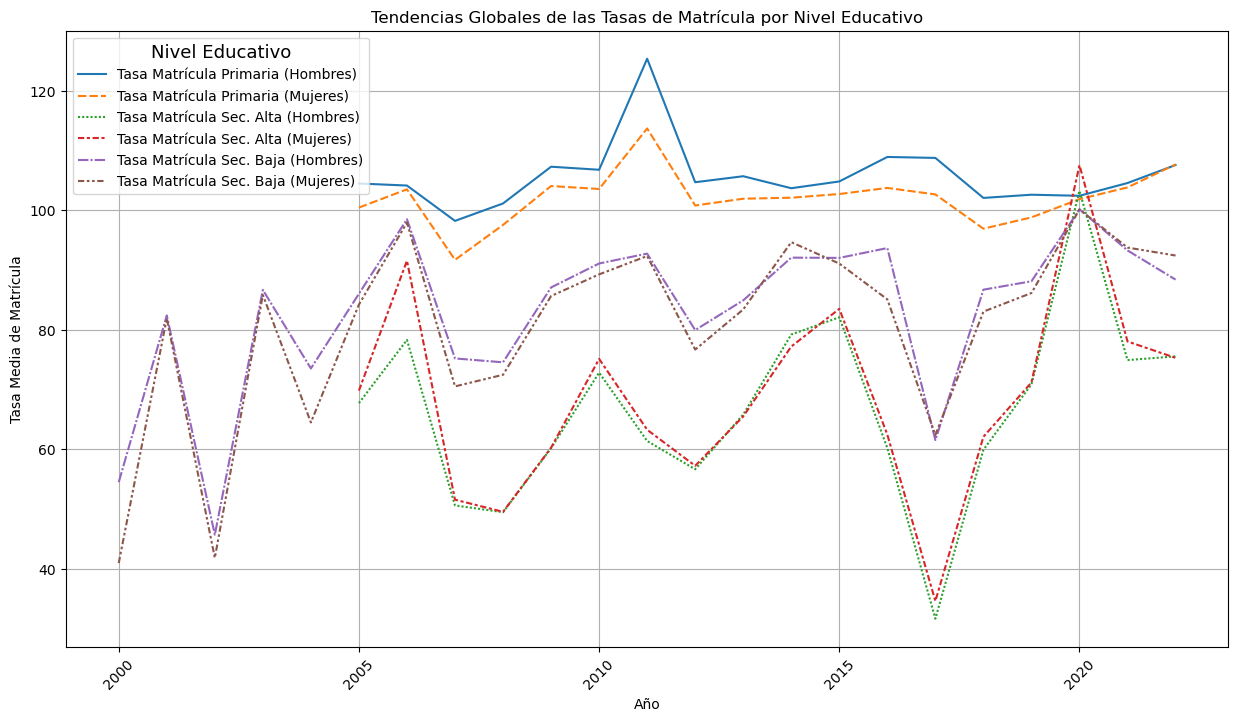

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumo que df1c es tu DataFrame original

# Filtrando los datos para incluir solo tasas de matrícula
tasas_matricula = df1c[df1c['Tipo de Dato Educativo'].str.contains('Tasa Matrícula')].copy()

# Asegurándonos de que 'Año' esté en formato adecuado para agrupar
tasas_matricula['Año'] = pd.to_datetime(tasas_matricula['Año']).dt.year

# Agrupando por Año y Tipo de Dato Educativo, y calculando la media de la Tasa
tasas_por_año = tasas_matricula.groupby(['Año', 'Tipo de Dato Educativo'])['Tasa'].mean().unstack()

# Creando el gráfico de líneas
plt.figure(figsize=(15, 8))
sns.lineplot(data=tasas_por_año)
plt.title('Tendencias Globales de las Tasas de Matrícula por Nivel Educativo')
plt.ylabel('Tasa Media de Matrícula')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Nivel Educativo', title_fontsize='13', loc='upper left')
plt.grid(True)
plt.show()


In [36]:
df1c

,Índice,ID,Pais,Año,Tipo de Dato Educativo,Tasa,Fuente Datos
432,432,53,Australia and New Zealand,2005-01-01,Tasa Matrícula Primaria (Hombres),101.7,"""United Nations Educational, Scientific and Cu..."
433,433,53,Australia and New Zealand,2005-01-01,Tasa Matrícula Primaria (Mujeres),102.9,"""United Nations Educational, Scientific and Cu..."
435,435,53,Australia and New Zealand,2005-01-01,Tasa Matrícula Sec. Baja (Hombres),114.3,"""United Nations Educational, Scientific and Cu..."
436,436,53,Australia and New Zealand,2005-01-01,Tasa Matrícula Sec. Baja (Mujeres),116.2,"""United Nations Educational, Scientific and Cu..."
438,438,53,Australia and New Zealand,2005-01-01,Tasa Matrícula Sec. Alta (Hombres),212.6,"""United Nations Educational, Scientific and Cu..."
...,...,...,...,...,...,...,...
7414,7414,716,Zimbabwe,2013-01-01,Tasa Matrícula Sec. Alta (Mujeres),38.9,"""United Nations Educational, Scientific and Cu..."
7416,7416,716,Zimbabwe,2015-01-01,Tasa Matrícula Primaria (Hombres),104.9,"""United Nations Educational, Scientific and Cu..."
7417,7417,716,Zimbabwe,2015-01-01,Tasa Matrícula Primaria (Mujeres),102.8,"""United Nations Educational, Scientific and Cu..."
7419,7419,716,Zimbabwe,2021-01-01,Tasa Matrícula Primaria (Hombres),95.9,"""United Nations Educational, Scientific and Cu..."


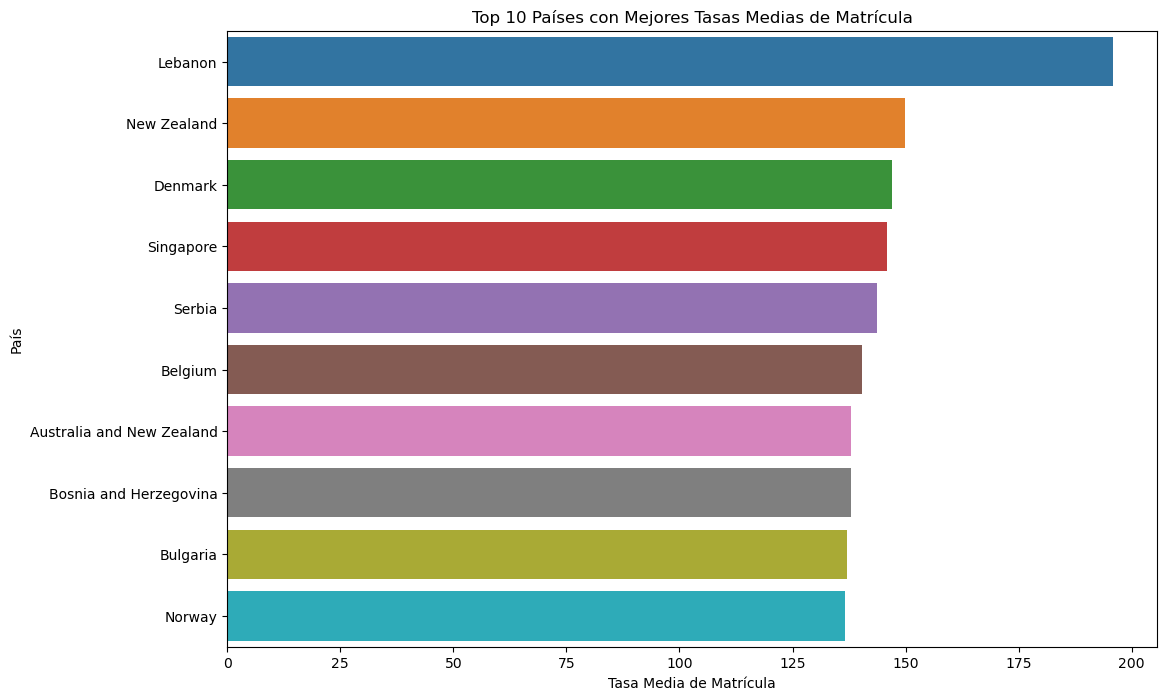

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df1c es tu DataFrame y que 'Pais' y 'Tasa' son nombres de tus columnas

# 1. Calcular la tasa media de matrícula por país
tasas_medias_por_pais = df1c.groupby('Pais')['Tasa'].mean().sort_values(ascending=False)

# 2. Seleccionar, por ejemplo, los 10 países con las mejores tasas medias
top_paises = tasas_medias_por_pais.head(10)

# 3. Crear un gráfico de barras para visualizar esta clasificación
plt.figure(figsize=(12, 8))
sns.barplot(x=top_paises.values, y=top_paises.index)
plt.title('Top 10 Países con Mejores Tasas Medias de Matrícula')
plt.xlabel('Tasa Media de Matrícula')
plt.ylabel('País')
plt.show()


In [38]:
# Obteniendo los valores únicos de la columna "Pais"
valores_unicos_area = df1c["Tipo de Dato Educativo"].unique()
valores_unicos_area


array(['Tasa Matrícula Primaria (Hombres)',
       'Tasa Matrícula Primaria (Mujeres)',
       'Tasa Matrícula Sec. Baja (Hombres)',
       'Tasa Matrícula Sec. Baja (Mujeres)',
       'Tasa Matrícula Sec. Alta (Hombres)',
       'Tasa Matrícula Sec. Alta (Mujeres)',
       'Estudiantes Secundaria Alta (miles)',
       'Estudiantes Primaria (miles)',
       'Estudiantes Secundaria Baja (miles)'], dtype=object)

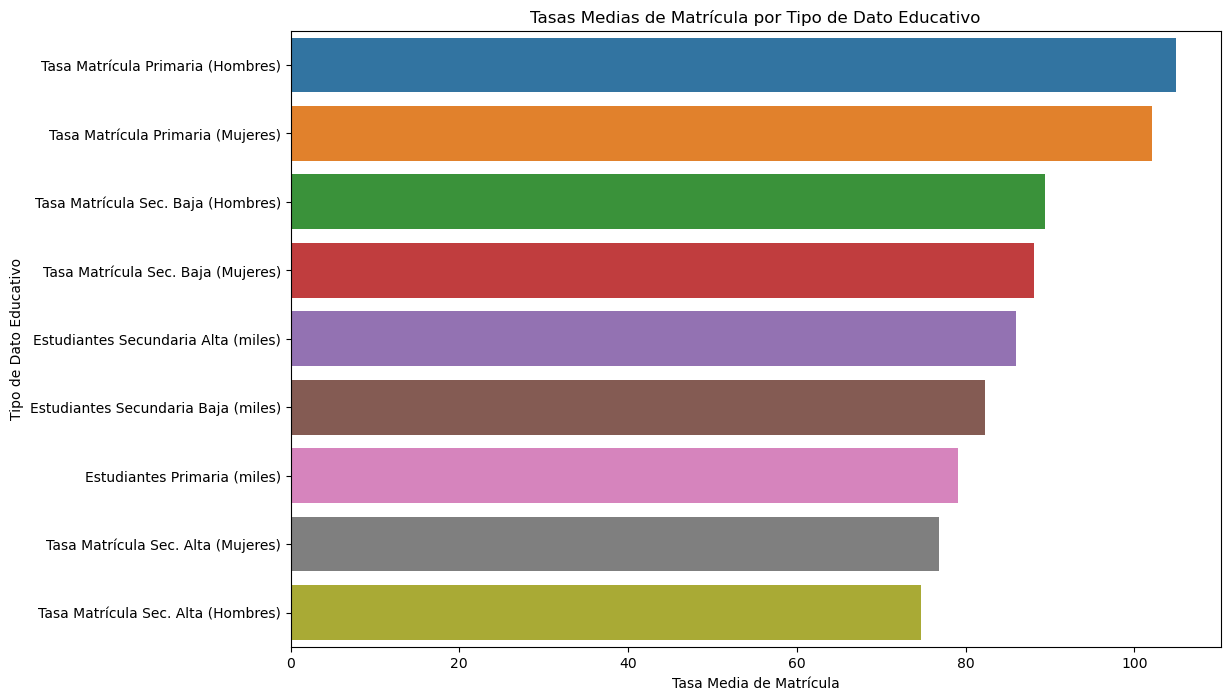

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df1c es tu DataFrame y que 'Tipo de Dato Educativo' y 'Tasa' son nombres de tus columnas

# 1. Calcular la tasa media de matrícula por tipo de dato educativo
tasas_medias_por_tipo = df1c.groupby('Tipo de Dato Educativo')['Tasa'].mean().sort_values(ascending=False)

# 2. Crear un gráfico de barras para visualizar esta clasificación
plt.figure(figsize=(12, 8))
sns.barplot(x=tasas_medias_por_tipo.values, y=tasas_medias_por_tipo.index)
plt.title('Tasas Medias de Matrícula por Tipo de Dato Educativo')
plt.xlabel('Tasa Media de Matrícula')
plt.ylabel('Tipo de Dato Educativo')
plt.show()


C:\Users\isabe\AppData\Local\Temp\ipykernel_5468\199860210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1c['Año'] = pd.to_datetime(df1c['Año']).dt.year


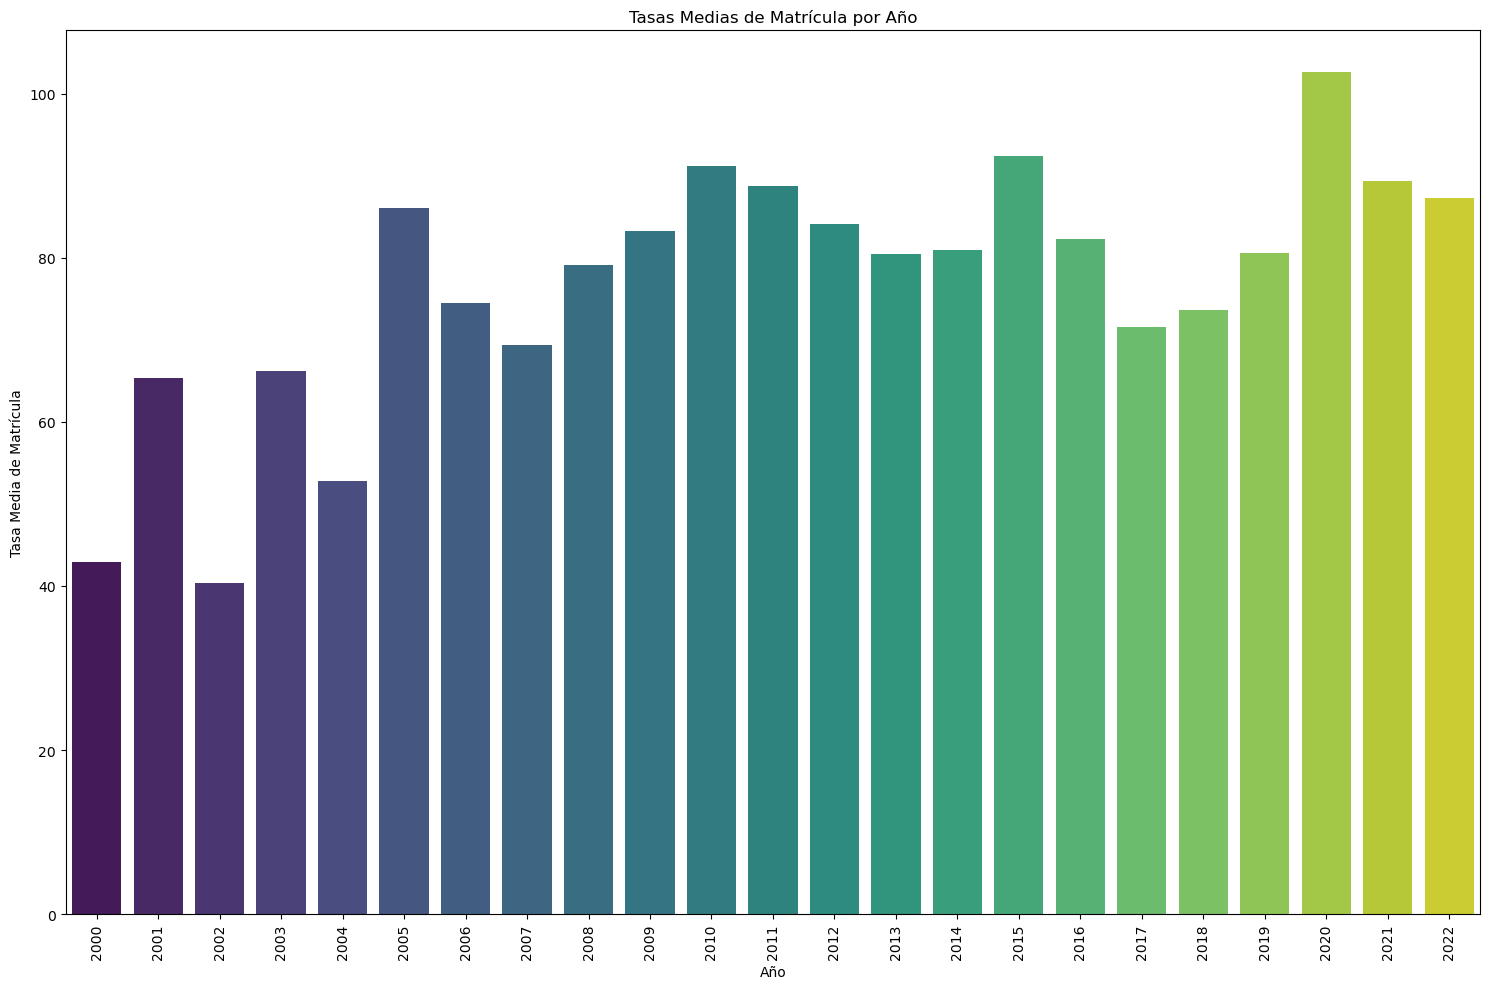

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que df1c es tu DataFrame original y que 'Año' y 'Tasa' son nombres de tus columnas

# Si 'Año' ya es un entero no es necesario convertirlo a datetime
df1c['Año'] = pd.to_datetime(df1c['Año']).dt.year

# Crear una copia del DataFrame para evitar SettingWithCopyWarning
df1c_copy = df1c.copy()

# Asegurarse de que 'Año' es un entero si no se ha convertido de datetime
df1c_copy['Año'] = df1c_copy['Año'].astype(int)

# 1. Calcular la tasa media de matrícula por año
tasas_medias_por_año = df1c_copy.groupby('Año')['Tasa'].mean().reset_index()

# 2. Crear un gráfico de barras para visualizar esta clasificación
plt.figure(figsize=(15, 10))
sns.barplot(x='Año', y='Tasa', data=tasas_medias_por_año, palette="viridis")
plt.title('Tasas Medias de Matrícula por Año')
plt.xlabel('Año')
plt.ylabel('Tasa Media de Matrícula')
plt.xticks(rotation=90)  # Rota los etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajusta la disposición
plt.show()


In [42]:
# Exportar esta muestra a un archivo CSV
#df_completo.to_csv('datos_educativos.csv', index=False)


C:\Users\isabe\AppData\Local\Temp\ipykernel_5468\94679715.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1c_seleccionados['Año'] = df1c_seleccionados['Año'].astype(int)


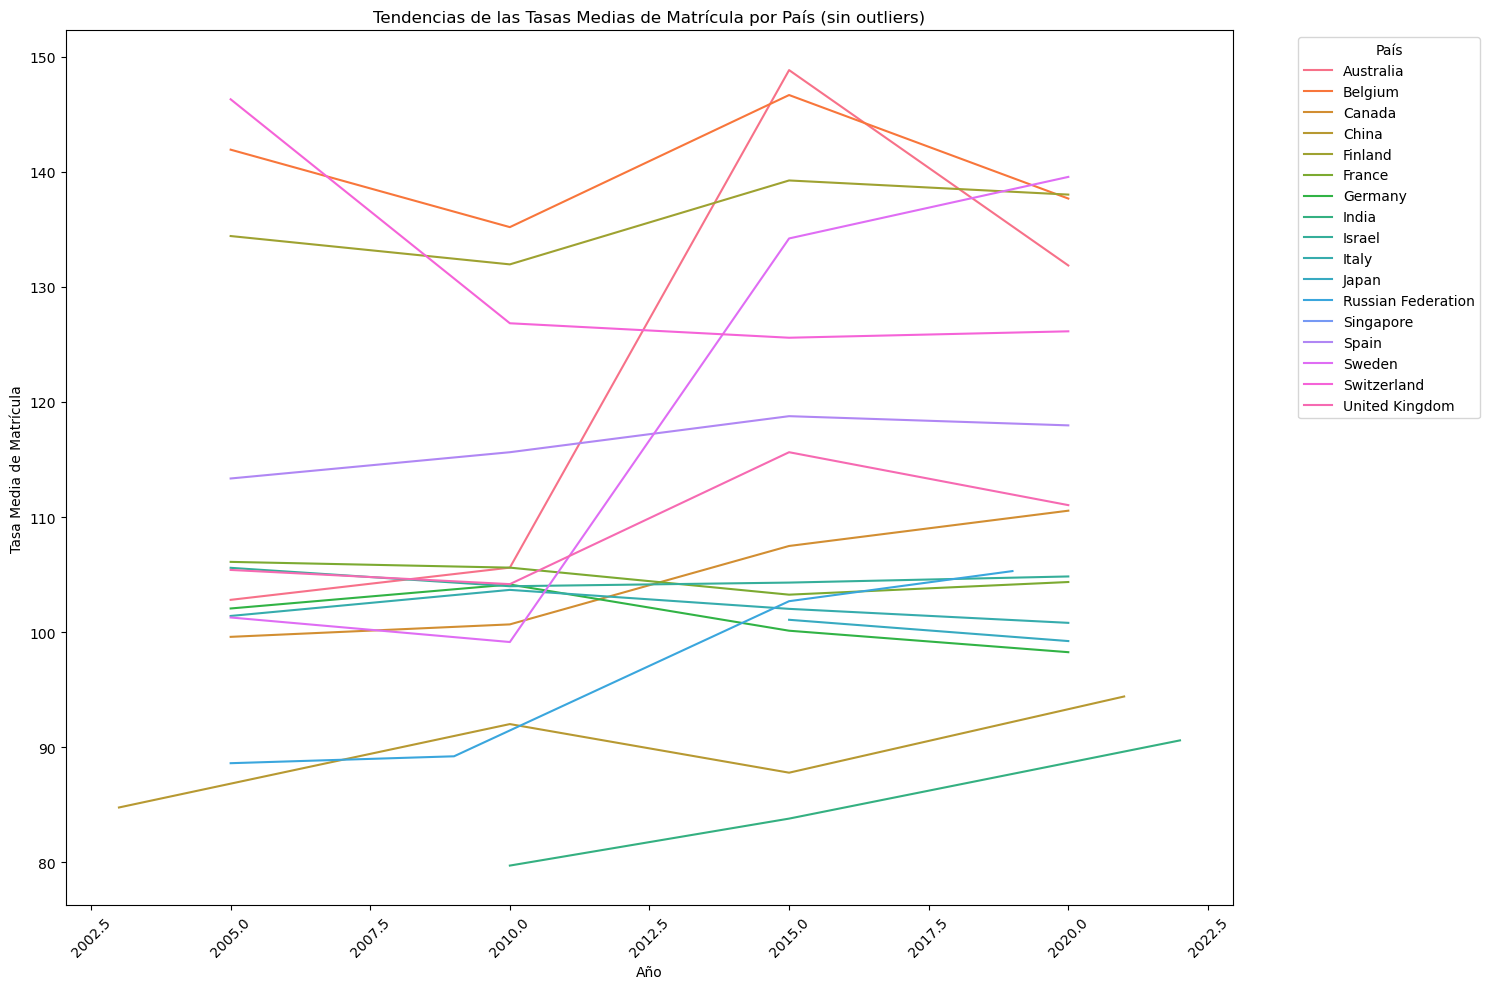

In [43]:
# Vamos a revisar los datos para los países indicados y buscar posibles outliers o datos incorrectos.

# Primero, crearemos una lista de los países seleccionados con los nombres correctos según el DataFrame.
paises_seleccionados = [
    "United States", "China", "United Kingdom", "Canada", "Germany", 
    "France", "Israel", "Japan", "Korea, Rep.", "India", "Russian Federation", 
    "Australia", "Singapore", "Finland", "Sweden", "Switzerland", 
    "Netherlands", "Belgium", "Italy", "Spain"
]

# Filtro el DataFrame original para incluir solo los países seleccionados.
df1c_seleccionados = df1c_copy[df1c_copy['Pais'].isin(paises_seleccionados)]

# Convertimos la columna 'Año' a entero.
df1c_seleccionados['Año'] = df1c_seleccionados['Año'].astype(int)

# Agrupamos por 'Pais' y 'Año' y calculamos la media de 'Tasa'.
tasas_medias_seleccionadas = df1c_seleccionados.groupby(['Pais', 'Año'])['Tasa'].mean().reset_index()

# Identificamos cualquier punto que sea un outlier potencial.
# Un método común es usar el rango intercuartílico (IQR).
Q1 = tasas_medias_seleccionadas['Tasa'].quantile(0.25)
Q3 = tasas_medias_seleccionadas['Tasa'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

# Filtramos los datos para excluir outliers.
cleaned_tasas_medias = tasas_medias_seleccionadas[~((tasas_medias_seleccionadas['Tasa'] < (Q1 - outlier_threshold)) | (tasas_medias_seleccionadas['Tasa'] > (Q3 + outlier_threshold)))]

# Ahora, volvemos a generar el gráfico de líneas sin los outliers.
plt.figure(figsize=(15, 10))
sns.lineplot(data=cleaned_tasas_medias, x='Año', y='Tasa', hue='Pais', legend="full")

plt.title('Tendencias de las Tasas Medias de Matrícula por País (sin outliers)')
plt.xlabel('Año')
plt.ylabel('Tasa Media de Matrícula')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta la disposición
plt.show()



In [44]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


C:\Users\isabe\AppData\Local\Temp\ipykernel_5468\3561672190.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


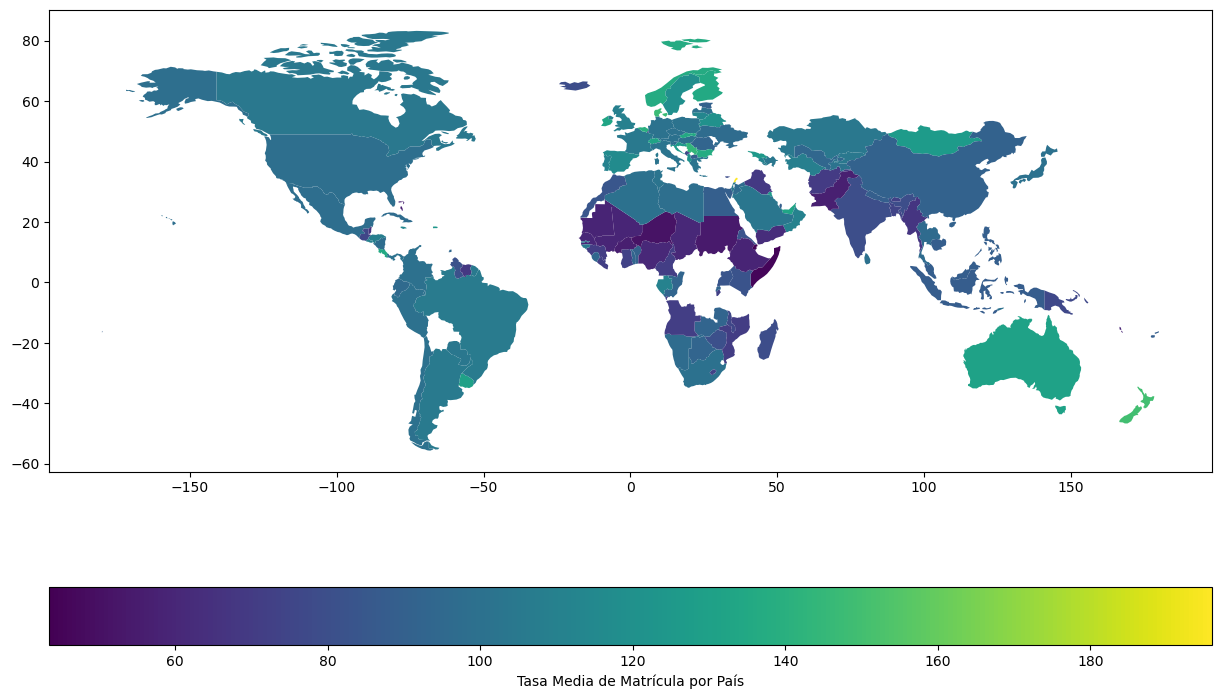

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar un DataFrame de geopandas con geometrías de países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Asumiendo que df1c_copy es tu DataFrame y que 'Pais' y 'Tasa' son nombres de tus columnas
# Calcular la tasa media de matrícula por país
tasas_medias_por_pais = df1c_copy.groupby('Pais')['Tasa'].mean().reset_index()

# Fusionar el DataFrame de tasas medias con el de geopandas basado en el nombre del país
map_data = world.merge(tasas_medias_por_pais, left_on='name', right_on='Pais')

# Crear el mapa de calor mundial
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
map_data.plot(column='Tasa', ax=ax, legend=True,
              legend_kwds={'label': "Tasa Media de Matrícula por País",
                           'orientation': "horizontal"})
plt.show()


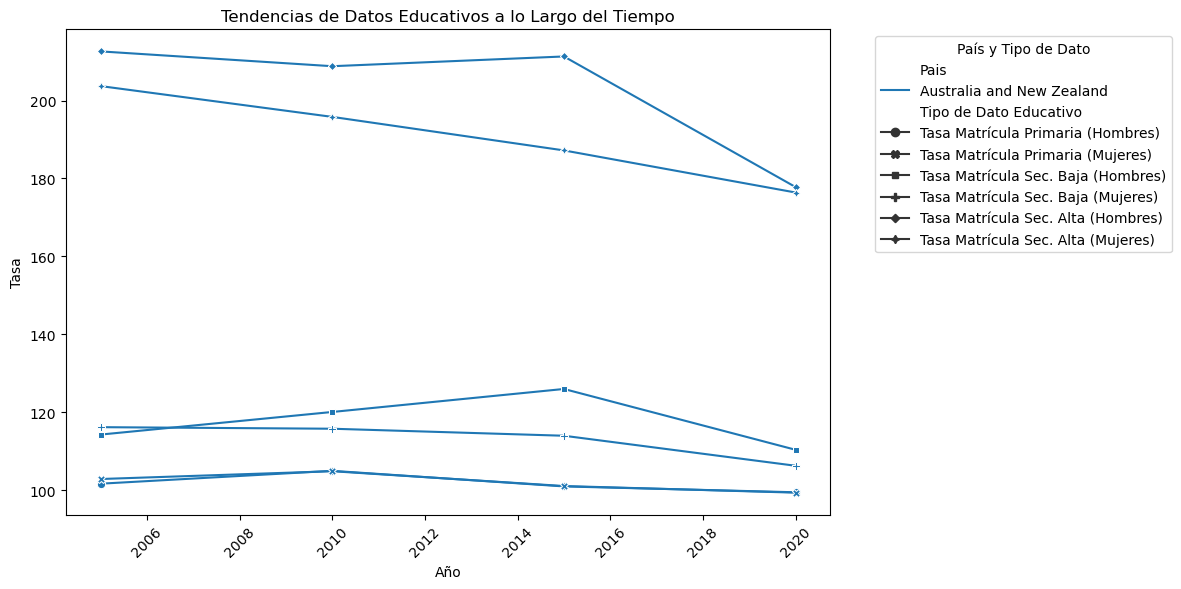

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar un par de países para el gráfico de línea
paises_seleccionados = df1c_copy['Pais'].unique()[:1]

# Filtrar los datos para estos países
data_linea = df1c_copy[df1c_copy['Pais'].isin(paises_seleccionados)]

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_linea, x="Año", y="Tasa", hue="Pais", style="Tipo de Dato Educativo", markers=True, dashes=False)
plt.title("Tendencias de Datos Educativos a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Tasa")
plt.xticks(rotation=45)
plt.legend(title='País y Tipo de Dato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [47]:
# Convertir la columna 'Año' a tipo string
data_barras['Año'] = data_barras['Año'].astype(str)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=data_barras, x="Pais", y="Tasa", hue="Año")
plt.title(f"Tasas de {tipo_dato_educativo} por País a lo Largo de los Años")
plt.xlabel("País")
plt.ylabel("Tasa")
plt.xticks(rotation=45)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


NameError: name 'data_barras' is not defined

# Próximas Actualizaciones del Dataset y Desarrollo de la API

**Estamos en proceso de desarrollar una API con interfaz gráfica que permitirá la manipulación y visualización interactiva de los gráficos basados en este dataset. Esta herramienta proporcionará una funcionalidad de acceso a través de una URL, facilitando un análisis más dinámico y adaptado a las necesidades específicas de los usuarios.**

**Recomendamos a todos los interesados mantenerse al tanto de las futuras actualizaciones de este dataset y las correspondientes mejoras en la herramienta. Nuestro objetivo es mejorar continuamente la accesibilidad y la utilidad de estos datos, proporcionando medios innovadores para su exploración y análisis.**

**Apreciamos su interés y apoyo continuo. ¡Esperamos presentarles estas emocionantes mejoras muy pronto**